In [33]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import pydot


In [22]:
#loading of data
from keras.datasets import mnist
digit_mnist=keras.datasets.mnist

In [23]:
(X_train_full,y_train_full),(X_test,y_test)=digit_mnist.load_data()

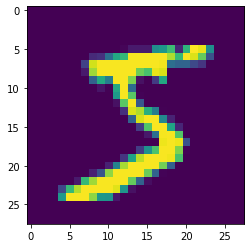

In [24]:
import matplotlib.pyplot as plt
plt.imshow(X_train_full[0])

In [25]:
y_train_full[0]

5

In [26]:
#data normalization
X_train_n=X_train_full/255.0
X_test_n=X_test/255.0

In [27]:
#split the data into train/validation/test datasets
X_valid,X_train=X_train_n[:6000],X_train_n[6000:]
y_valid,y_train=y_train_full[:6000],y_train_full[6000:]
X_test=X_test_n

In [20]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [30]:
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
#create an ann model with two dense layers of neurons
digit=keras.models.Sequential()
digit.add(keras.layers.Flatten(input_shape=[28,28]))
digit.add(keras.layers.Dense(200,activation="relu"))
digit.add(keras.layers.Dense(100,activation="relu"))
digit.add(keras.layers.Dense(10,activation="softmax"))
digit.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


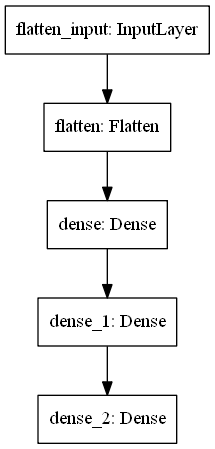

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(digit)

In [40]:
weights,biases=digit.layers[1].get_weights()
weights


array([[ 0.02570029, -0.00921319, -0.02297589, ...,  0.03759523,
         0.01990343, -0.00419658],
       [ 0.0493257 ,  0.07532704,  0.04591972, ...,  0.01272719,
         0.07017377,  0.06893378],
       [-0.00902112,  0.0490617 ,  0.01508749, ...,  0.00632862,
        -0.02900814, -0.04371899],
       ...,
       [ 0.06044598,  0.02830634,  0.04788385, ..., -0.02156743,
        -0.06206664, -0.06688078],
       [ 0.03822813,  0.07278952,  0.02177001, ..., -0.04696669,
        -0.04292265,  0.0316055 ],
       [-0.01534326, -0.03178874, -0.04308994, ...,  0.00643031,
         0.02572545, -0.03443564]], dtype=float32)

In [38]:
weights.shape


(784, 200)

In [39]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [47]:
#compiling andtraining the model
digit.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
digit_history=digit.fit(X_train,y_train,epochs=60,validation_data=(X_valid,y_valid))

Epoch 1/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0077 - accuracy: 0.9994 - val_loss: 0.0792 - val_accuracy: 0.9777
Epoch 2/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0074 - accuracy: 0.9995 - val_loss: 0.0818 - val_accuracy: 0.9775
Epoch 3/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0072 - accuracy: 0.9996 - val_loss: 0.0793 - val_accuracy: 0.9777
Epoch 4/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0069 - accuracy: 0.9996 - val_loss: 0.0810 - val_accuracy: 0.9783
Epoch 5/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0066 - accuracy: 0.9997 - val_loss: 0.0828 - val_accuracy: 0.9777
Epoch 6/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0064 - accuracy: 0.9997 - val_loss: 0.0801 - val_accuracy: 0.9797
Epoch 7/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0062 - accuracy: 0.9997 - val_loss: 0.0814 - val_accuracy:

1688/1688 [==============================] - 3s 2ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0919 - val_accuracy: 0.9777
Epoch 58/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0908 - val_accuracy: 0.9780
Epoch 59/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0923 - val_accuracy: 0.9773
Epoch 60/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0925 - val_accuracy: 0.9780


In [48]:
digit_history.params

{'verbose': 1, 'epochs': 60, 'steps': 1688}

In [49]:
digit_history.history

{'loss': [0.0077424803748726845,
  0.007424980867654085,
  0.007220801431685686,
  0.006892298348248005,
  0.00664051529020071,
  0.006392093375325203,
  0.006161103490740061,
  0.005980895832180977,
  0.0056968810968101025,
  0.005541431717574596,
  0.005331001710146666,
  0.005139889195561409,
  0.004994451534003019,
  0.004840645473450422,
  0.0046555595472455025,
  0.004504730924963951,
  0.004403341561555862,
  0.004254386760294437,
  0.004093533847481012,
  0.004033053293824196,
  0.0038803531788289547,
  0.003772481344640255,
  0.0036646556109189987,
  0.003557623131200671,
  0.0034499906469136477,
  0.003365868702530861,
  0.0032705862540751696,
  0.003202371299266815,
  0.003106101183220744,
  0.0030606845393776894,
  0.002955349627882242,
  0.002887960057705641,
  0.0028310874477028847,
  0.0027726301923394203,
  0.0026943145785480738,
  0.0026323539204895496,
  0.0025957697071135044,
  0.0025252792984247208,
  0.0024734591133892536,
  0.0024282094091176987,
  0.0023749424144

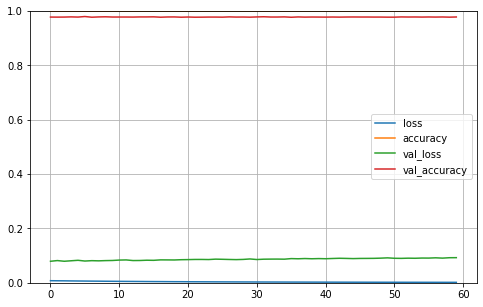

In [54]:
pd.DataFrame(digit_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [64]:
#evaluate the performance &predict using keras
digit.evaluate(X_test,y_test)
X_new=X_test[:5]


313/313 [==============================] - 0s 1ms/step - loss: 0.0838 - accuracy: 0.9805


In [65]:
y_proba=digit.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [66]:
y_pred=np.argmax(digit.predict(X_new), axis=-1)
y_pred

array([7, 2, 1, 0, 4], dtype=int64)

AxesImage(54,36;334.8x217.44)


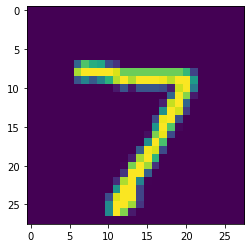

In [67]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


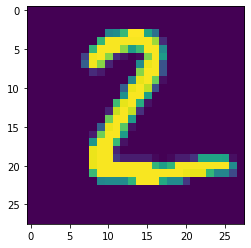

In [68]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


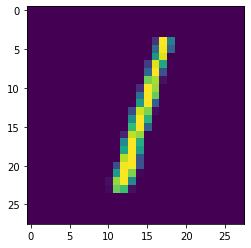

In [69]:
print(plt.imshow(X_test[2]))

AxesImage(54,36;334.8x217.44)


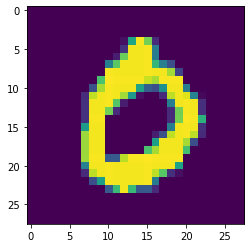

In [71]:
print(plt.imshow(X_test[3]))

AxesImage(54,36;334.8x217.44)


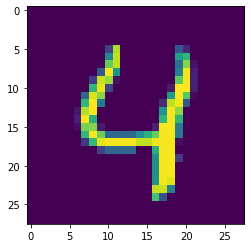

In [72]:
print(plt.imshow(X_test[4]))